Q1. What is the fundamental idea behind ensemble techniques? How does
bagging differ from boosting in terms of approach and objective?

Ans: The fundamental idea behind ensemble techniques is to combine multiple weak learners to create a stronger, more accurate, and robust model than any individual model alone. These methods aim to reduce errors by leveraging the collective intelligence of several models. Bagging (Bootstrap Aggregating) builds multiple independent models in parallel using random subsets of the training data and combines their predictions (through averaging or voting) to reduce variance and improve stability. In contrast, Boosting builds models sequentially, where each new model focuses on correcting the errors of the previous ones, thereby reducing bias and progressively improving performance. While bagging mainly reduces variance, boosting primarily reduces bias.

Q2.: Explain how the Random Forest Classifier reduces overfitting compared to
a single decision tree. Mention the role of two key hyperparameters in this process.

Ans:A Random Forest Classifier reduces overfitting by combining the predictions of many decision trees trained on different random subsets of the data and features, which prevents any single tree from memorizing the training set. This ensemble approach averages out the errors of individual trees, leading to better generalization. Two key hyperparameters play a crucial role in controlling overfitting: n_estimators, which determines the number of trees in the forest (more trees generally improve stability and reduce variance), and max_features, which controls the number of features considered when splitting at each node (using fewer features increases randomness and decreases correlation among trees, further reducing overfitting).

Q3.What is Stacking in ensemble learning? How does it differ from traditional
bagging/boosting methods? Provide a simple example use case.

Ans:Stacking (or stacked generalization) is an ensemble learning technique that combines predictions from multiple different models (called base learners) using another model, known as a meta-learner or blender, which learns how to best combine their outputs. Unlike bagging (which builds several independent models on random data samples and averages their predictions) or boosting (which builds models sequentially to correct the errors of previous ones), stacking trains diverse models in parallel and then uses their predictions as input features for a higher-level model. For example, in a house price prediction task, we might use a Random Forest, Gradient Boosting, and Linear Regression as base learners, and then train a Logistic Regression or another model as the meta-learner to optimally combine their predictions for improved accuracy.

Q4.What is the OOB Score in Random Forest, and why is it useful? How does
it help in model evaluation without a separate validation set?

Ans:The OOB (Out-of-Bag) Score in a Random Forest is an internal validation score that estimates the model’s performance without needing a separate validation or test set. During training, each tree in the forest is built using a bootstrap sample—a random subset of the data created by sampling with replacement. On average, about one-third of the samples are not included in this subset and are called out-of-bag samples. These OOB samples are then used to test the corresponding tree’s predictions, providing an unbiased estimate of its accuracy. By averaging the results across all trees, the OOB score gives a reliable measure of model performance, helping detect overfitting and saving data that would otherwise be needed for validation.

Q5.Compare AdaBoost and Gradient Boosting in terms of:

- How they handle errors from weak learners

-  Weight adjustment mechanism
- Typical use cases

Ans: **AdaBoost** and **Gradient Boosting** are both boosting techniques that combine multiple weak learners to form a strong predictive model, but they differ in how they handle errors and adjust model weights.

* **Handling Errors:**

  * **AdaBoost** focuses on misclassified samples by increasing their weights so that the next weak learner pays more attention to those difficult cases.
  * **Gradient Boosting** minimizes a specified loss function by fitting each new weak learner to the **residual errors** (the difference between actual and predicted values) of the previous model.

* **Weight Adjustment Mechanism:**

  * **AdaBoost** explicitly adjusts **sample weights** — increasing weights for misclassified instances and decreasing them for correctly classified ones.
  * **Gradient Boosting** does not modify sample weights directly; instead, it updates model predictions using **gradient descent** to minimize the overall loss function.

* **Typical Use Cases:**

  * **AdaBoost** works well for relatively clean datasets and simpler problems such as **binary classification** and **spam detection**.
  * **Gradient Boosting** is more flexible and powerful, commonly used for complex tasks like **regression**, **ranking**, and **structured data problems** (e.g., XGBoost, LightGBM, CatBoost).


Q6.Why does CatBoost perform well on categorical features without requiring
extensive preprocessing? Briefly explain its handling of categorical variables.

Ans:CatBoost performs well on categorical features because it uses a specialized technique called target-based encoding with ordered statistics, which allows it to handle categorical variables natively without needing extensive preprocessing like one-hot encoding. Instead of converting categories into many binary columns, CatBoost transforms each categorical value into a numerical value based on the average target value for that category, while carefully avoiding target leakage. It does this by calculating these averages in an ordered or permutation-based manner—using only information from previous rows during training—so that future data doesn’t influence the encoding. This efficient, leak-free encoding preserves useful category information, reduces dimensionality, and improves performance, making CatBoost especially effective for datasets rich in categorical variables.

Q7.: KNN Classifier Assignment: Wine Dataset Analysis with
Optimization
Task:
1. Load the Wine dataset (sklearn.datasets.load_wine()).
2. Split data into 70% train and 30% test.
3. Train a KNN classifier (default K=5) without scaling and evaluate using:
a. Accuracy
b. Precision, Recall, F1-Score (print classification report)
4. Apply StandardScaler, retrain KNN, and compare metrics.
5. Use GridSearchCV to find the best K (test K=1 to 20) and distance metric
(Euclidean, Manhattan).
6. Train the optimized KNN and compare results with the unscaled/scaled versions.

In [1]:
# Import required libraries
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# 1. Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# 2. Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# -----------------------
# 3. KNN without scaling
# -----------------------
knn_unscaled = KNeighborsClassifier(n_neighbors=5)
knn_unscaled.fit(X_train, y_train)
y_pred_unscaled = knn_unscaled.predict(X_test)

print("=== KNN without Scaling ===")
print("Accuracy:", accuracy_score(y_test, y_pred_unscaled))
print("Classification Report:\n", classification_report(y_test, y_pred_unscaled))

# -----------------------
# 4. KNN with StandardScaler
# -----------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)

print("\n=== KNN with StandardScaler ===")
print("Accuracy:", accuracy_score(y_test, y_pred_scaled))
print("Classification Report:\n", classification_report(y_test, y_pred_scaled))

# -----------------------
# 5. GridSearchCV for Optimization
# -----------------------
param_grid = {
    'n_neighbors': range(1, 21),
    'metric': ['euclidean', 'manhattan']
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

print("\n=== Grid Search Results ===")
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# -----------------------
# 6. Train Optimized KNN
# -----------------------
best_knn = grid_search.best_estimator_
y_pred_best = best_knn.predict(X_test_scaled)

print("\n=== Optimized KNN (After GridSearchCV) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))

# -----------------------
# 7. Compare All Models
# -----------------------
results = pd.DataFrame({
    'Model': ['Unscaled KNN', 'Scaled KNN', 'Optimized KNN'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_unscaled),
        accuracy_score(y_test, y_pred_scaled),
        accuracy_score(y_test, y_pred_best)
    ]
})

print("\n=== Model Comparison ===")
print(results)


=== KNN without Scaling ===
Accuracy: 0.7222222222222222
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.78      0.67      0.72        21
           2       0.50      0.60      0.55        15

    accuracy                           0.72        54
   macro avg       0.72      0.72      0.72        54
weighted avg       0.74      0.72      0.73        54


=== KNN with StandardScaler ===
Accuracy: 0.9444444444444444
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.86      0.92        21
           2       0.83      1.00      0.91        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54


=== Grid Search Results ===
Best Parameters: {'metric': 'euclidean', '

Q8.PCA + KNN with Variance Analysis and Visualization
Task:
1. Load the Breast Cancer dataset (sklearn.datasets.load_breast_cancer()).
2. Apply PCA and plot the scree plot (explained variance ratio).
3. Retain 95% variance and transform the dataset.
4. Train KNN on the original data and PCA-transformed data, then compare
accuracy.
5. Visualize the first two principal components using a scatter plot (color by class).

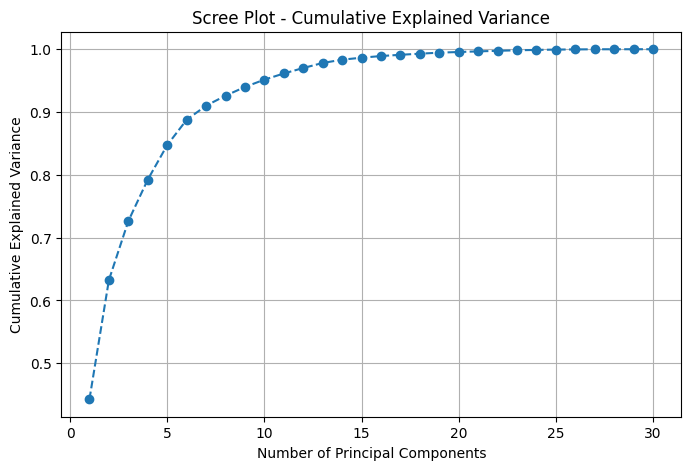

Number of components retained for 95% variance: 10

=== KNN Accuracy Comparison ===
Original Data Accuracy: 0.9708
PCA-Reduced Data Accuracy (95% variance): 0.9474


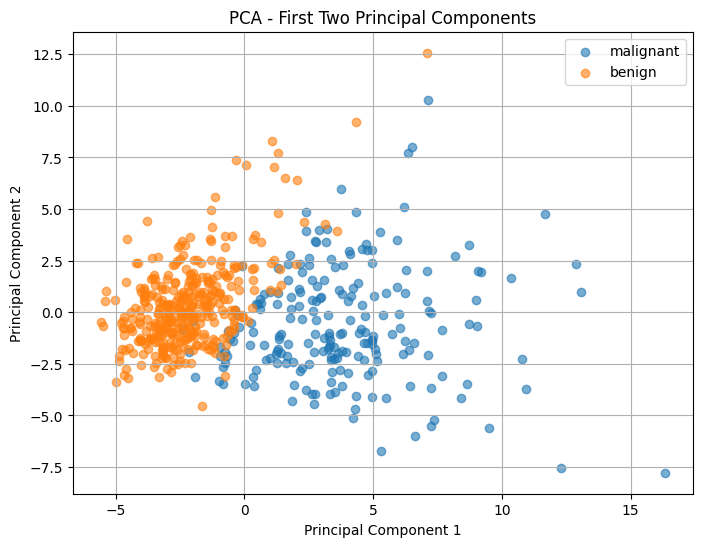

In [2]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 1. Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Standardize the features before applying PCA or KNN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Apply PCA and plot the scree plot (explained variance ratio)
pca_full = PCA()
pca_full.fit(X_scaled)
explained_variance = np.cumsum(pca_full.explained_variance_ratio_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title("Scree Plot - Cumulative Explained Variance")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

# 3. Retain 95% variance and transform the dataset
pca_95 = PCA(0.95)
X_pca = pca_95.fit_transform(X_scaled)
print(f"Number of components retained for 95% variance: {pca_95.n_components_}")

# 4. Train KNN on original data vs PCA-transformed data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)
X_train_pca, X_test_pca, _, _ = train_test_split(X_pca, y, test_size=0.3, random_state=42, stratify=y)

knn_original = KNeighborsClassifier(n_neighbors=5)
knn_original.fit(X_train, y_train)
y_pred_orig = knn_original.predict(X_test)
acc_orig = accuracy_score(y_test, y_pred_orig)

knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)
acc_pca = accuracy_score(y_test, y_pred_pca)

print("\n=== KNN Accuracy Comparison ===")
print(f"Original Data Accuracy: {acc_orig:.4f}")
print(f"PCA-Reduced Data Accuracy (95% variance): {acc_pca:.4f}")

# 5. Visualize the first two principal components
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca_2d[y == 0, 0], X_pca_2d[y == 0, 1], label=data.target_names[0], alpha=0.6)
plt.scatter(X_pca_2d[y == 1, 0], X_pca_2d[y == 1, 1], label=data.target_names[1], alpha=0.6)
plt.title("PCA - First Two Principal Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.show()


Q9.KNN Regressor with Distance Metrics and K-Value
Analysis
Task:
1. Generate a synthetic regression dataset
(sklearn.datasets.make_regression(n_samples=500, n_features=10)).
2. Train a KNN regressor with:
a. Euclidean distance (K=5)
b. Manhattan distance (K=5)
c. Compare Mean Squared Error (MSE) for both.
3. Test K=1, 5, 10, 20, 50 and plot K vs. MSE to analyze bias-variance tradeoff.


=== Distance Metric Comparison (K=5) ===
Euclidean Distance MSE : 4837.0363
Manhattan Distance MSE : 5428.5875


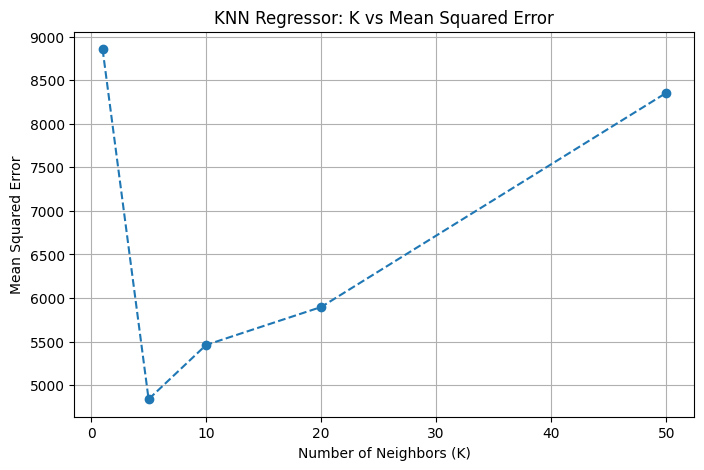


=== K vs MSE (Bias-Variance Analysis) ===
    K  MSE (Euclidean)
0   1      8857.089533
1   5      4837.036252
2  10      5460.141051
3  20      5896.142654
4  50      8355.614125


In [3]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# 1. Generate a synthetic regression dataset
X, y = make_regression(n_samples=500, n_features=10, noise=10, random_state=42)

# Split into train-test sets (70-30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features for fair distance calculation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2a. KNN Regressor with Euclidean distance (default metric)
knn_euclidean = KNeighborsRegressor(n_neighbors=5, metric='euclidean')
knn_euclidean.fit(X_train_scaled, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test_scaled)
mse_euclidean = mean_squared_error(y_test, y_pred_euclidean)

# 2b. KNN Regressor with Manhattan distance
knn_manhattan = KNeighborsRegressor(n_neighbors=5, metric='manhattan')
knn_manhattan.fit(X_train_scaled, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test_scaled)
mse_manhattan = mean_squared_error(y_test, y_pred_manhattan)

# Compare Mean Squared Errors
print("=== Distance Metric Comparison (K=5) ===")
print(f"Euclidean Distance MSE : {mse_euclidean:.4f}")
print(f"Manhattan Distance MSE : {mse_manhattan:.4f}")

# 3. Analyze K vs MSE for Bias-Variance tradeoff
k_values = [1, 5, 10, 20, 50]
mse_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k, metric='euclidean')
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# Plot K vs MSE
plt.figure(figsize=(8, 5))
plt.plot(k_values, mse_scores, marker='o', linestyle='--')
plt.title("KNN Regressor: K vs Mean Squared Error")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Mean Squared Error")
plt.grid(True)
plt.show()

# Print summary table
import pandas as pd
results = pd.DataFrame({
    'K': k_values,
    'MSE (Euclidean)': mse_scores
})
print("\n=== K vs MSE (Bias-Variance Analysis) ===")
print(results)


Q10.KNN with KD-Tree/Ball Tree, Imputation, and Real-World
Data
Task:
1. Load the Pima Indians Diabetes dataset (contains missing values).
2. Use KNN Imputation (sklearn.impute.KNNImputer) to fill missing values.
3. Train KNN using:
a. Brute-force method
b. KD-Tree
c. Ball Tree
4. Compare their training time and accuracy.
5. Plot the decision boundary for the best-performing method (use 2 most important
features).

Dataset shape: (768, 9)
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Missing values before imputation:
 Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                

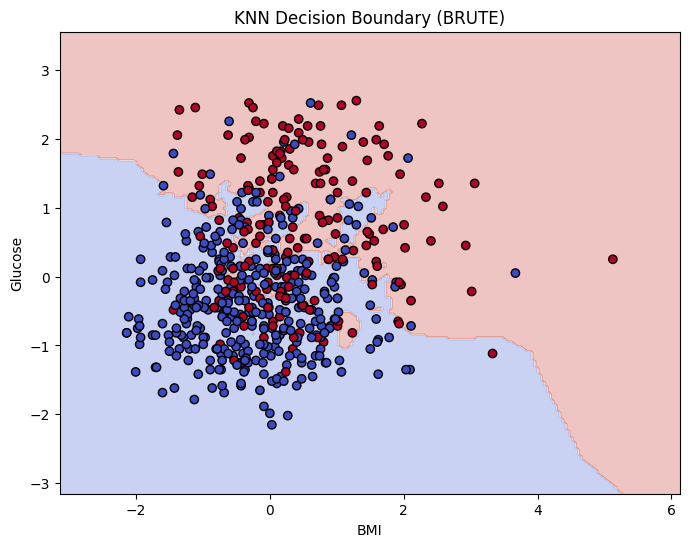

In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import mutual_info_classif

# 1. Load the Pima Indians Diabetes dataset
df = pd.read_csv("diabetes.csv")
print("Dataset shape:", df.shape)
print(df.head())

# Identify missing values represented as zeros in some medical columns
cols_with_zeros = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df[cols_with_zeros] = df[cols_with_zeros].replace(0, np.nan)
print("\nMissing values before imputation:\n", df.isna().sum())

# Split features and target
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# 2. Apply KNN Imputer to fill missing values
imputer = KNNImputer(n_neighbors=5)
X_imputed = imputer.fit_transform(X)
X = pd.DataFrame(X_imputed, columns=X.columns)
print("\nMissing values after imputation:\n", X.isna().sum())

# Standardize features for KNN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# 3. Train KNN using different algorithms and record time
algorithms = ["brute", "kd_tree", "ball_tree"]
results = []

for algo in algorithms:
    start = time.time()
    knn = KNeighborsClassifier(n_neighbors=5, algorithm=algo)
    knn.fit(X_train, y_train)
    end = time.time()

    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    train_time = end - start

    results.append((algo, acc, train_time))
    print(f"\nAlgorithm: {algo}")
    print(f"Accuracy: {acc:.4f}")
    print(f"Training Time: {train_time:.4f} seconds")

# 4. Compare their training time and accuracy
results_df = pd.DataFrame(results, columns=["Algorithm", "Accuracy", "Training Time (s)"])
print("\n=== Comparison of KNN Algorithms ===")
print(results_df)

# 5. Plot decision boundary for best-performing method
best_algo = results_df.sort_values(by="Accuracy", ascending=False).iloc[0]["Algorithm"]
print(f"\nBest performing algorithm: {best_algo}")

# Select top 2 most important features using mutual information
mi = mutual_info_classif(X, y)
important_features = np.argsort(mi)[-2:]
X_2d = X.iloc[:, important_features].values

# Split again using top 2 features
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(
    X_2d, y, test_size=0.3, random_state=42, stratify=y
)

# Scale selected features
scaler_2d = StandardScaler()
X_train_2d = scaler_2d.fit_transform(X_train_2d)
X_test_2d = scaler_2d.transform(X_test_2d)

# Train KNN with best algorithm
knn_best = KNeighborsClassifier(n_neighbors=5, algorithm=best_algo)
knn_best.fit(X_train_2d, y_train_2d)

# Plot decision boundary
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
Z = knn_best.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train_2d, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title(f"KNN Decision Boundary ({best_algo.upper()})")
plt.xlabel(df.columns[important_features[0]])
plt.ylabel(df.columns[important_features[1]])
plt.show()
